<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/tf_practice_main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

url='https://raw.githubusercontent.com/Prakface/Practice/master/initialFeatures.csv'

data=pd.read_csv(url)

df=pd.DataFrame(data)

data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)

df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

   image  url  question  original  ...  retweets_count  hour     level  result
0    0.0  1.0       0.0       1.0  ...             0.0  11.0 -0.040000     0.0
1    0.0  1.0       0.0       1.0  ...             0.0  10.0 -0.047619     0.0
2    0.0  1.0       0.0       1.0  ...             0.0  10.0  0.000000     0.0
3    1.0  0.0       0.0       1.0  ...             0.0  10.0  0.000000     0.0
4    0.0  1.0       0.0       1.0  ...             0.0  10.0 -0.040000     0.0
5    0.0  0.0       0.0       0.0  ...            54.0  10.0  0.000000     0.0

[6 rows x 29 columns]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

dataset=df2

X = dataset.iloc[:, 0:28].values #all coulumns excpet the last 29th column
y = dataset.iloc[:,28 ].values  # the last 29th column (0 to 28) , hence last column is 28

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


print(len(X), len(y), len(X_train), len(y_train))




sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



A = tf.Variable(tf.random_normal(shape=[28, 1]))  #weight vector (column)
b = tf.Variable(tf.random_normal(shape=[1, 1]))   # bias value
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

data = tf.placeholder(dtype=tf.float32, shape=[None, 28])  #one row or group of rows with 28 columns, data tuples
target = tf.placeholder(dtype=tf.float32, shape=[None, 1]) # one row or group of rows with 28 columns, data tuples

mod = tf.matmul(data, A) + b



for i in range(len(X_train)):
    loss = ((y_train[i] * tf.log(tf.sigmoid(tf.transpose(A)*X_train[i]))) + ((1 - y_train[i]) * tf.log(1 - tf.sigmoid(tf.transpose(A)*X_train[i]))))         
                        
learning_rate = .005
batch_size = 30
iter_num = 1500

# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Define the goal
goal = opt.minimize(loss)

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []


5875 5875 4112 4112


In [21]:



# training model
for epoch in range(iter_num):
    # Generate random batch index
    #print(len(X_train))
    batch_index = np.random.choice(len(X_train), size=batch_size)
    #print(batch_index)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    #batch_train_y = y_train[batch_index]
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    
    
    
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print(epoch + 1, temp_loss, temp_train_acc, temp_test_acc)



300 [[-0.88145435 -0.44036138 -0.6773145  -0.2263241  -8.1669     -0.70681995
  -0.7734702  -0.70738447 -0.67909694 -0.69671214 -0.73340183 -1.133754
  -0.6931472  -0.3774704  -0.68073213 -0.675113   -0.6557771  -0.6801495
  -0.725783   -0.8985921  -0.81128746 -0.7210775  -2.895856   -0.647874
  -0.68592507 -0.6454073  -2.1443565  -1.1262267 ]] 0.5440175 0.5331821
600 [[-0.88964    -0.9584296  -0.7040509  -0.2614146          nan -0.71558255
  -0.7917388  -0.72933704 -0.68254    -0.69969875 -0.7465177  -1.2561598
  -0.6931472  -0.39489523 -0.75373554 -0.6770755  -0.6576611  -0.681481
  -0.75299233 -0.9204473  -0.8329257  -0.7359894  -4.476195   -0.8514705
  -1.4126418  -0.64734924 -3.0242233  -1.3564264 ]] 0.0 0.0
900 [[-0.89792025 -2.3182142  -0.73226327 -0.30726036         nan -0.7244946
  -0.8105775  -0.7522254  -0.68600744 -0.7027031  -0.759951   -1.3917806
  -0.6931472  -0.41367108 -0.83761686 -0.67904615 -0.6595527  -0.68281615
  -0.78158665 -0.94295365 -0.8553088  -0.75132185 -6.

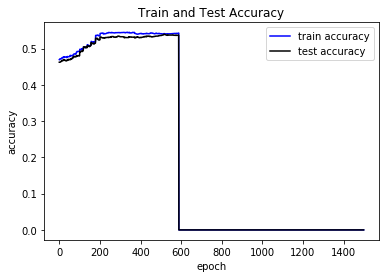

In [22]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [23]:


# The above program with half data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler



df_t=df2.iloc[lambda x: x.index % 2 != 0]
dataset=df_t

X = dataset.iloc[:, 0:28].values #all coulumns excpet the last 29th column
y = dataset.iloc[:,28 ].values  # the last 29th column (0 to 28) , hence last column is 28

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


print(len(X), len(y), len(X_train), len(y_train))




sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



A = tf.Variable(tf.random_normal(shape=[28, 1]))  #weight vector (column)
b = tf.Variable(tf.random_normal(shape=[1, 1]))   # bias value
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

data = tf.placeholder(dtype=tf.float32, shape=[None, 28])  #one row or group of rows with 28 columns, data tuples
target = tf.placeholder(dtype=tf.float32, shape=[None, 1]) # one row or group of rows with 28 columns, data tuples

mod = tf.matmul(data, A) + b



for i in range(len(X_train)):
    loss = ((y_train[i] * tf.log(tf.sigmoid(tf.transpose(A)*X_train[i]))) + ((1 - y_train[i]) * tf.log(1 - tf.sigmoid(tf.transpose(A)*X_train[i]))))         
                        
learning_rate = .005
batch_size = 30
iter_num = 1500

# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Define the goal
goal = opt.minimize(loss)

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []



2937 2937 2055 2055


In [24]:



# training model
for epoch in range(iter_num):
    # Generate random batch index
    #print(len(X_train))
    batch_index = np.random.choice(len(X_train), size=batch_size)
    #print(batch_index)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    #batch_train_y = y_train[batch_index]
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    
    
    
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print(epoch + 1, temp_loss, temp_train_acc, temp_test_acc)



300 [[-8.2031596e-01 -8.2994914e-01 -6.6178417e-01 -1.7293632e+00
  -5.9357762e-01 -8.3972737e-03 -1.0579920e+01 -7.0701432e+00
  -6.5281445e-01 -7.4694306e-01 -6.9942480e-01 -8.5168600e-01
  -6.9314718e-01 -6.5180600e-01 -7.0181602e-01 -1.3939183e+00
  -5.3054035e-01 -6.8402815e-01 -7.1452004e-01 -6.0938334e-01
  -6.5877885e-01 -5.4586989e-01 -9.8687470e-01 -1.5191978e-01
  -7.2507375e-01 -7.2279418e-01 -2.3191655e+00 -5.8758003e-01]] 0.46812654 0.47845805
600 [[ -0.82707787  -1.9624956   -0.6884044   -2.250706    -0.6063329
   -0.0143367           nan -13.139025    -0.6565871   -0.7509495
   -0.712396    -0.9277114   -0.6931472   -0.6914488   -0.7749218
   -2.4777327   -0.91435975  -0.6851545   -0.74397033  -0.6199694
   -0.6762498   -0.554603    -1.6689596   -0.24524617  -0.72622997
   -0.7248374   -3.54413     -0.6755278 ]] 0.0 0.0
900 [[-0.83391154 -3.8554282  -0.71653634 -2.8464217  -0.619491   -0.04730612
          nan         nan -0.6603906  -0.75498486 -0.7256995  -1.0121291
 

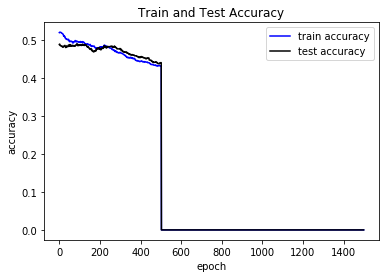

In [25]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()